## Importing scenario

In [1]:
import sys
sys.path.append('/home/praveen/workspace/carla/PythonAPI/agents/navigation/')
import carla
import matplotlib.pyplot as plt
import networkx as nx
from local_planner import RoadOption

%matplotlib inline

In [2]:
client = carla.Client('localhost', 2000)

In [3]:
world = client.get_world()

In [4]:
world_map = world.get_map()

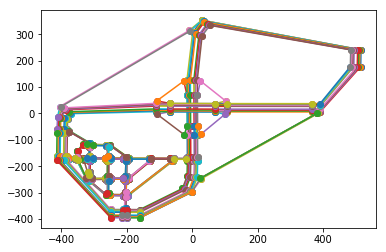

In [5]:
topology = world_map.get_topology()
for segment in topology:
    x1, y1 = segment[0].transform.location.x, segment[0].transform.location.y
    x2, y2 = segment[1].transform.location.x, segment[1].transform.location.y
    x1, x2 = -x1, -x2
    plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()

In [6]:
topology = world_map.get_topology()
toplist = []
for segment in topology:
    x1, y1 = segment[0].transform.location.x, segment[0].transform.location.y
    x2, y2 = segment[1].transform.location.x, segment[1].transform.location.y
    toplist.append([(x1,y1),(x2,y2)])

In [10]:
len(world_map.get_topology())

552

In [11]:
from global_route_planner import GlobalRoutePlanner
from global_route_planner_dao import GlobalRoutePlannerDAO

dao = GlobalRoutePlannerDAO(world_map)
grp = GlobalRoutePlanner(dao)
# grp.setup()

In [12]:
grp.setup()

In [10]:
test_wp = world_map.get_waypoint(carla.Location(405.97, -114.60))
test_wp.get_left_lane()
test_wp.lane_change & carla.LaneChange.Right

1

In [15]:
def draw_path(path):
    for i in range(len(path) - 1):
        v1, v2 = path[i], path[i+1]
        x1, y1, _ = grp._graph.nodes[v1]['vertex']
        x2, y2, _ = grp._graph.nodes[v2]['vertex']
        x1, x2 = -x1, -x2
        plt.plot([x1, x2], [y1, y2], color = 'blue')
        plt.arrow(
            x1, y1, ((x2+x1)/2 - x1), ((y2+y1)/2 - y1),
            shape='full', lw=0, length_includes_head=True, head_width=20)
    plt.show()

In [12]:
nx.shortest_path(grp._graph, 243, 272, weight='length')

# nx.shortest_path(grp.graph, 222, 118, weight='length')

[243, 242, 241, 240, 272]

[215, 214, 213, 261, 246, 244, 245, 305, 288, 289, 292, 293, 298, 340, 319, 320, 349, 204, 209, 80, 78, 180, 181, 314]


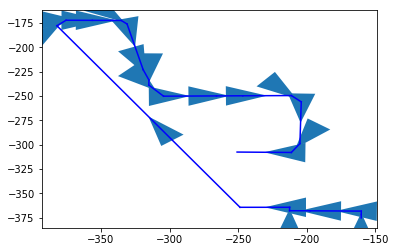

In [18]:
path = grp._path_search(carla.Location(x = 176.1, y = -375, z = 1), carla.Location(228.1, -307.7, 0))
print path
draw_path(path)

# path = grp._path_search(carla.Location(-392.2, 40.5), carla.Location(-493.8, 212.3))
# grp._path_search(carla.Location(405.97, -114.60), carla.Location(409, -114.31))
# grp.path_search((196.947, -5.602), (78.730, -50.091))

In [19]:
grp.plan_route(carla.Location(x = 176.1, y = -375, z = 1), carla.Location(228.1, -307.7, 0))
# grp.plan_route(carla.Location(x = 381.5, y = -121.2, z = 1), carla.Location(228.1, -307.7, 0))
# grp.plan_route(carla.Location(-392.2, 40.5), carla.Location(-493.8, 212.3))
# grp.plan_route(carla.Location(405.97, -114.60), carla.Location(409, -114.31))
# grp.plan_route((360, -2.2), (88.4, 164))
# grp.plan_route((196.947, -5.602), (78.730, -50.091))

[<RoadOption.CHANGELANERIGHT: 6>,
 <RoadOption.CHANGELANERIGHT: 6>,
 <RoadOption.STRAIGHT: 3>,
 <RoadOption.RIGHT: 2>,
 <RoadOption.STRAIGHT: 3>,
 <RoadOption.LEFT: 1>,
 <RoadOption.STRAIGHT: 3>,
 <RoadOption.RIGHT: 2>,
 <RoadOption.RIGHT: 2>]

In [ ]:
xo, yo = -55, 3
xd, yd = -77.664, 72.72
grp.path_search((xo, yo), (xd, yd))

In [ ]:
xo, yo = -53.004, 2.886
xd, yd = -77.664, 72.72
grp.plan_route((xo, yo), (xd, yd))

In [ ]:
w1, w2 = topology[6]
w = w1
wd = w2
count = 0
print('Intersection start and end ?', w1.is_intersection, w2.is_intersection)
while True:
    w = w.next(1)[0]
    print('Is intersection ?', w.is_intersection)
    if w.transform.location.distance(wd.transform.location) < 1:
        print('Found destination !')
        break
    if count < 10000:
        count += 1
    else:
        print('Could not reach end')
        break

In [ ]:
grp.graph.edges[3, 257]

In [ ]:
w.is_intersection

In [ ]:
w.next(1)

In [ ]:
# w = world_map.get_waypoint(carla.Location(x=120, y=1.68, z=0))

In [ ]:
xo, yo = 120, -2.27
xd, yd = 334.7, 165
heading = (1, 0)
start = grp.localise(xo, yo, toplist)
end= grp.localise(xd, yd, grp.topology)
start = grp.align(start, grp.get_direction(start))
end = grp.align(end, grp.get_direction(end))

graph, idmap = grp.build_graph()
route = nx.shortest_path(graph, idmap[start[0]], idmap[end[1]])
route

In [ ]:
for i in range(1, len(route)):
    x1, y1 = graph.nodes[route[i-1]]['vertex']
    x2, y2 = graph.nodes[route[i]]['vertex']
    plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()

In [ ]:
grp.plan_route((xo, yo), heading, (xd, yd), graph, idmap, toplist)